In [459]:
import re
from collections import Counter
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import requests
from urllib.request import urlopen
import numpy as np

In [506]:
def getips(location):
    with open(location) as f:
        logs=f.read()
        #regexp=r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
        regexp="(.*?)- -"
        re2='(GET|POST|OPTIONS)(.*?)(HTTP)'
    return re.findall(regexp,logs),re.findall(re2,logs)

def gettimestamps(location):
    with open(location) as f:
        logs=f.read()
        regexp='\[(.*?)\]'
    return re.findall(regexp,logs)
def get_size(location):
    mylist=[]
    with open(location) as f:
        for logs in f:
            regexp='\d+$'
            mylist.append(re.findall(regexp,logs))
    return mylist

In [535]:
def getstatuscode(location):
    mylist=[]
    with open(location) as f:
        for logs in f:
            regexp='\d+$'
            temp=logs
            val=re.sub(regexp,'',temp)
            mylist.append(re.findall('\d+\s$',val))
    return mylist

In [546]:
statuscode=getstatuscode("C:\\Users\\arjun\\Desktop\\logfile1.txt")
newsize=[]
for i in range(len(statuscode)-6):
    if statuscode[i]!=[]:
        newsize.append(int(statuscode[i][0]))
    else:
        newsize.append(0)

data['statuscode']=newsize

In [509]:
mysize=get_size("C:\\Users\\arjun\\Desktop\\logfile1.txt")
len(mysize)

1546

In [287]:
def getfreq(mylist):
    return dict(Counter(mylist))

In [291]:
allips,websites=getips("C:\\Users\\arjun\\Desktop\\logfile1.txt")
freq=getfreq(allips)
timestamps=gettimestamps("C:\\Users\\arjun\\Desktop\\logfile1.txt")
websites

[('GET',
  ' /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables ',
  'HTTP'),
 ('GET', ' /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 ', 'HTTP'),
 ('GET', ' /mailman/listinfo/hsdivision ', 'HTTP'),
 ('GET', ' /twiki/bin/view/TWiki/WikiSyntax ', 'HTTP'),
 ('GET', ' /twiki/bin/view/Main/DCCAndPostFix ', 'HTTP'),
 ('GET',
  ' /twiki/bin/oops/TWiki/AppendixFileSystem?template=oopsmore&param1=1.12&param2=1.12 ',
  'HTTP'),
 ('GET', ' /twiki/bin/view/Main/PeterThoeny ', 'HTTP'),
 ('GET',
  ' /twiki/bin/edit/Main/Header_checks?topicparent=Main.ConfigurationVariables ',
  'HTTP'),
 ('GET', ' /twiki/bin/attach/Main/OfficeLocations ', 'HTTP'),
 ('GET', ' /twiki/bin/view/TWiki/WebTopicEditTemplate ', 'HTTP'),
 ('GET', ' /twiki/bin/view/Main/WebChanges ', 'HTTP'),
 ('GET',
  ' /twiki/bin/edit/Main/Smtpd_etrn_restrictions?topicparent=Main.ConfigurationVariables ',
  'HTTP'),
 ('GET', ' /mailman/listinfo/business ', 'HTTP'),
 ('GET', ' /twiki/bin/rdiff/Main

In [404]:
print(len(allips),len(websites),len(timestamps))

1546 1540 1546


In [405]:
temp=timestamps
for i in temp:
    if i=='^A-Za-z':
        timestamps.remove('^A-Za-z')

In [406]:
print(len(allips),len(websites),len(timestamps))

1546 1540 1546


In [416]:
data=pd.DataFrame()

In [417]:
data['IP']=allips
len(data)


1546

In [418]:
data['TimeStamp']=timestamps

In [421]:
data.iloc[906]

IP           h24-71-236-129.ca.shawcable.net 
TimeStamp          09/Mar/2004:14:43:02 -0800
Name: 907, dtype: object

In [420]:
data=data.drop(906)
data=data.drop(1545)
data=data.drop(1544)
data=data.drop(1543)
data=data.drop(1542)
data=data.drop(1541)

In [397]:
"""data['websites']=websites
for i in range(len(data["websites"])):
    data.iloc[i]"""

'data[\'websites\']=websites\nfor i in range(len(data["websites"])):\n    data.iloc[i]'

In [414]:
len(data)
ranger=[]
for i in range(1540):
    ranger.append(i)
data=data.reindex(ranger)
data.iloc[906]

IP           NaN
TimeStamp    NaN
Name: 906, dtype: object

In [432]:
#data['websites'][0]=data['websites'][0][1]
#a=data['websites'][0][1]
#data['websites'][0]=a
for i in range(len(websites)):
    websites[i]=websites[i][1]


In [433]:
websites

[' /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables ',
 ' /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 ',
 ' /mailman/listinfo/hsdivision ',
 ' /twiki/bin/view/TWiki/WikiSyntax ',
 ' /twiki/bin/view/Main/DCCAndPostFix ',
 ' /twiki/bin/oops/TWiki/AppendixFileSystem?template=oopsmore&param1=1.12&param2=1.12 ',
 ' /twiki/bin/view/Main/PeterThoeny ',
 ' /twiki/bin/edit/Main/Header_checks?topicparent=Main.ConfigurationVariables ',
 ' /twiki/bin/attach/Main/OfficeLocations ',
 ' /twiki/bin/view/TWiki/WebTopicEditTemplate ',
 ' /twiki/bin/view/Main/WebChanges ',
 ' /twiki/bin/edit/Main/Smtpd_etrn_restrictions?topicparent=Main.ConfigurationVariables ',
 ' /mailman/listinfo/business ',
 ' /twiki/bin/rdiff/Main/WebIndex?rev1=1.2&rev2=1.1 ',
 ' /twiki/bin/view/TWiki/DontNotify ',
 ' /twiki/bin/view/Main/TokyoOffice ',
 ' /twiki/bin/view/Main/MikeMannix ',
 ' /twiki/bin/attach/Main/PostfixCommands ',
 ' /robots.txt ',
 ' /twiki/bin/rdiff/Know/ReadmeFirs

In [434]:
data['websites']=websites

In [455]:
date=timestamps[0][:2]
date

'07'

In [464]:
date=[]
for i in range(len(data)):
    date.append(timestamps[i][:2])

In [466]:
data['date']=date


In [486]:
month=[]
for i in range(len(data)):
    month.append(timestamps[i][3:6])

In [493]:
time=[]
for i in range(len(data)):
    time.append(timestamps[i][12:20])
data['time']=time

In [487]:
data['month']=month

In [514]:
mysize[1][0]

'4523'

In [524]:
newsize=[]
for i in range(len(mysize)-6):
    if mysize[i]!=[]:
        newsize.append(int(mysize[i][0]))
    else:
        newsize.append(0)
        

In [526]:
data['size']=newsize

In [496]:
data.drop(['TimeStamp'],axis=1,inplace=True)

In [547]:
data

,IP,websites,date,month,time,size,statuscode
0,64.242.88.10,/twiki/bin/edit/Main/Double_bounce_sender?top...,07,Mar,16:05:49,12846,401
1,64.242.88.10,/twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1...,07,Mar,16:06:51,4523,200
2,64.242.88.10,/mailman/listinfo/hsdivision,07,Mar,16:10:02,6291,200
3,64.242.88.10,/twiki/bin/view/TWiki/WikiSyntax,07,Mar,16:11:58,7352,200
4,64.242.88.10,/twiki/bin/view/Main/DCCAndPostFix,07,Mar,16:20:55,5253,200
...,...,...,...,...,...,...,...
1536,10.0.0.153,/dccstats/stats-spam-ratio.1year.png,12,Mar,12:23:41,3438,200
1537,10.0.0.153,/dccstats/stats-hashes.1year.png,12,Mar,12:23:41,1670,200
1538,10.0.0.153,/mailman/listinfo/webber,12,Mar,12:23:41,2651,200
1539,10.0.0.153,/razor.html,12,Mar,12:23:41,2023,200


In [35]:
ip=[]
count=[]
for key,value in freq.items():
    if value>1:
        ip.append(key)
        count.append(value)
    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

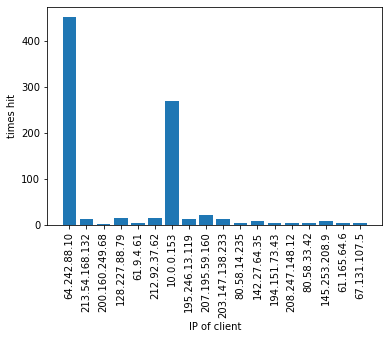

In [36]:
plt.bar(ip,count)
plt.xlabel("IP of client")
plt.ylabel("times hit")
plt.xticks(rotation=90)

In [548]:
data

,IP,websites,date,month,time,size,statuscode
0,64.242.88.10,/twiki/bin/edit/Main/Double_bounce_sender?top...,07,Mar,16:05:49,12846,401
1,64.242.88.10,/twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1...,07,Mar,16:06:51,4523,200
2,64.242.88.10,/mailman/listinfo/hsdivision,07,Mar,16:10:02,6291,200
3,64.242.88.10,/twiki/bin/view/TWiki/WikiSyntax,07,Mar,16:11:58,7352,200
4,64.242.88.10,/twiki/bin/view/Main/DCCAndPostFix,07,Mar,16:20:55,5253,200
...,...,...,...,...,...,...,...
1536,10.0.0.153,/dccstats/stats-spam-ratio.1year.png,12,Mar,12:23:41,3438,200
1537,10.0.0.153,/dccstats/stats-hashes.1year.png,12,Mar,12:23:41,1670,200
1538,10.0.0.153,/mailman/listinfo/webber,12,Mar,12:23:41,2651,200
1539,10.0.0.153,/razor.html,12,Mar,12:23:41,2023,200


In [549]:
data.to_csv("final_logs.csv")